### Ecuaciones Diferenciales Ordinarias

Necesitamos una ecuacion y sus correspondientes condiciones de frontera

#### Método de Euler

$$ \frac{dx}{dt} = \sin(x) $$

¿Como transformamos una derivada a algo que entienda el ordenador?

$$ \frac{dx}{dt} = \lim_{\Delta t \rightarrow 0} \frac{x(t + \Delta t) - x(t)}{\Delta t} $$

($\Delta t$ es muy pequeño, cometemos un error)

La solución sería:

$$ x(t + \Delta t) = x(t) + \Delta t \cdot \sin(x(t)) $$

Tenemos el tiempo cuantizado en intervalos $\Delta t$, que será la resolución de nuestra derivada. Introducimos la notación $x(t=n\Delta t) = x_n$.

$$x_{n+1} = x_n + \Delta t \cdot \sin(x(t)) $$

Para calcular el error hacemos un desarrollo de Taylor de primer orden (método de orden 1):

$$ x_{n+1} = x(t) + \Delta t \left| \frac{dx}{dt} \right|_{\Delta t = 0} + O(\Delta t^2) \quad \rightarrow \quad Err = O(\Delta t^2) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

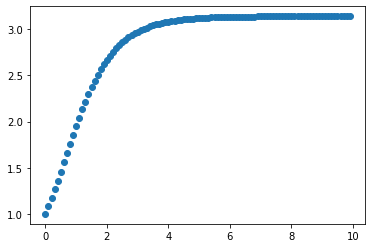

In [4]:
def euler(f, x, t, dt):
    return x + dt * f(x, t)

f = lambda x, t: np.sin(x)
dt = 0.1
n = 100
t = np.linspace(0, (n-1) * dt, n)

x = [1]
for i in range(1, n):
    x.append(euler(f, x[i-1], t[i], dt))

plt.scatter(t, x)

#### Runge Kutta 2º orden

$$
k_1 = \Delta t f(t_n, x_n)
\\
k_2 = \Delta t f \left( t_n + \frac{1}{2} \Delta t, x_n + \frac{1}{2} k_1 \right)
\\
x_{n+1} = x_n + k_2 + O(\Delta t^3)
$$

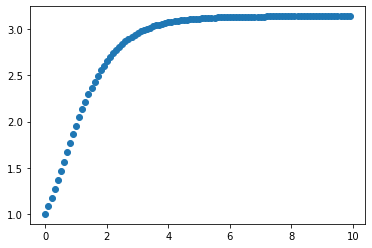

In [3]:
def runge_kutta_2(f, x, t, dt):
    k1 = dt * f(x, t)
    k2 = dt * f(x + 0.5*k1, t + 0.5*dt)
    return x + k2

f = lambda x, t: np.sin(x)
dt = 0.1
n = 100
t = np.linspace(0, (n-1) * dt, n)

x = [1]
for i in range(1, n):
    x.append(runge_kutta_2(f, x[i-1], t[i], dt))

plt.scatter(t, x)

#### Runge Kutta 4º orden

$$
k_1 = \Delta t f(t_n, x_n)
\\
k_2 = \Delta t f \left( t_n + \frac{1}{2} \Delta t, x_n + \frac{1}{2} k_1 \right)
\\
k_3 = \Delta t f \left( t_n + \frac{1}{2} \Delta t, x_n + \frac{1}{2} k_2 \right)
\\
k_4 = \Delta t f \left( t_n + \Delta t, x_n + k_3 \right)
\\
x_{n+1} = x_n + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} + O(\Delta t^5)
$$

In [4]:
def runge_kutta_4(f, x, t, dt):
    k1 = dt * f(x, t)
    k2 = dt * f(x + 0.5*k1, t + 0.5*dt)
    k3 = dt * f(x + 0.5*k2, t + 0.5*dt)
    k4 = dt * f(x + k3, t + dt)
    return x + k1/6 + k2/3 + k3/3 + k4/6

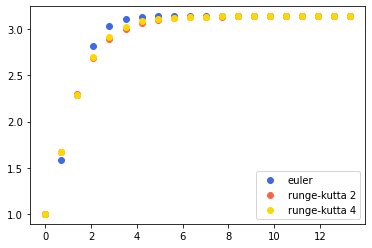

In [5]:
def ode(f, x0, dt, n, metodo):
    t = np.linspace(0, (n-1) * dt, n)
    x = [x0]
    for i in range(1, n):
        x.append(metodo(f, x[i-1], t[i], dt))
    return (x, t)

f = lambda x, t: np.sin(x)
dt = 0.7
n = 20

x_euler, t_euler = ode(f, 1, dt, n, euler)
plt.scatter(t_euler, x_euler, color="royalblue", label="euler")

x_kutta, t_kutta = ode(f, 1, dt, n, runge_kutta_2)
plt.scatter(t_kutta, x_kutta, color="tomato", label="runge-kutta 2")

x_kutta4, t_kutta4 = ode(f, 1, dt, n, runge_kutta_4)
plt.scatter(t_kutta4, x_kutta4, color="gold", label="runge-kutta 4")

plt.legend()

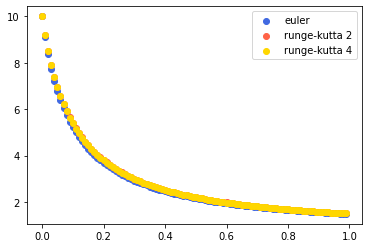

In [6]:
f = lambda P, t, r, k: r * P * (1 - P/k) 

r = 1
k = 1
f_ = lambda P, t: f(P, t, r, k)

dt = 0.01
n = 100
P0 = 10

x_euler, t_euler = ode(f_, P0, dt, n, euler)
plt.scatter(t_euler, x_euler, color="royalblue", label="euler")

x_kutta, t_kutta = ode(f_, P0, dt, n, runge_kutta_2)
plt.scatter(t_kutta, x_kutta, color="tomato", label="runge-kutta 2")

x_kutta4, t_kutta4 = ode(f_, P0, dt, n, runge_kutta_4)
plt.scatter(t_kutta4, x_kutta4, color="gold", label="runge-kutta 4")

plt.legend()

#### Sistemas de orden superior

$$ \ddot{x} + w_0^2 x = 0 $$

$$
\frac{dx}{dt} = f(t, x, y)
\\
\frac{dy}{dt} = f(t, x, y)
$$

$$
\frac{dx}{dt} = y
\\
\frac{dy}{dt} = -w_0^2x
$$

In [92]:
# Funciones mejoradas

def euler(i, f, x, t, dt):
    return x[i] + dt * f[i](*x, t)

def x_medio(x, k):
    return [x[i] + 0.5*k[i] for i in range(len(x))]

def k_n(n, f, x, t, dt):
    if n == 0:
        return []
    k = [[dt * fi(*x, t) for fi in f]]
    for i in range(1, n):
        k.append([dt * fi(*x_medio(x, k[i-1]), t + 0.5*dt) for fi in f])
    return k

def runge_kutta_2(i, f, x, t, dt, k1):
    k2 = dt * f[i](*x_medio(x, k1), t + 0.5*dt)
    return x[i] + k2

def runge_kutta_4(i, f, x, t, dt, k1, k2, k3):
    k4 = dt * f[i](*[x[j] + k3[j] for j in range(len(x))], t + dt)
    return x[i] + k1[i]/6 + k2[i]/3 + k3[i]/3 + k4/6

def ode(f : list, x0 : list, dt : float, n : int, metodo, orden):
    t = np.linspace(0, (n-1) * dt, n)
    x = [[x_] for x_ in x0]
    for i in range(1, n):
        xi = [x[j][i-1] for j in range(len(x))]
        k = k_n(orden-1, f, xi, t[i], dt)
        for j in range(len(x)):
            x[j].append(metodo(j, f, xi, t[i], dt, *k))
    return (*x, t)

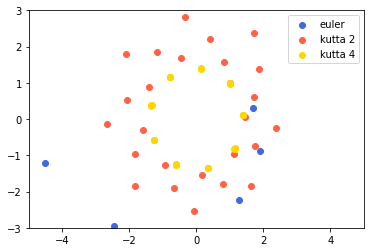

In [71]:
# Ejercicio 2

x0 = 1
w0 = 1
dt = 0.7
vueltas = 3
n = int(2 * np.pi * (1 / dt) * vueltas)

f = lambda x, y, t: y
g = lambda x, y, t: -w0**2 * x

x_euler, y_euler, t_euler = ode((f, g), (x0, w0), dt, n, euler, 1)
plt.scatter(x_euler, y_euler, color="royalblue", label="euler")

x_kutta, y_kutta, t_kutta = ode((f, g), (x0, w0), dt, n, runge_kutta_2, 2)
plt.scatter(x_kutta, y_kutta, color="tomato", label="kutta 2")

x_kutta4, y_kutta4, t_kutta4 = ode((f, g), (x0, w0), dt, n, runge_kutta_4, 4)
plt.scatter(x_kutta4, y_kutta4, color="gold", label="kutta 4")

plt.xlim(-5, 5)
plt.ylim(-3, 3)

plt.legend()

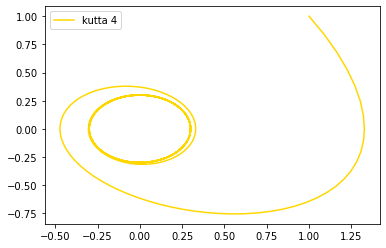

In [90]:
# Ejercicio 3

x0 = 1
w0 = 1
dt = 0.1
vueltas = 10
n = int(2 * np.pi * (1 / dt) * vueltas)

b = 1
F = 0.3
w = 1

f = lambda x, y, t: y
g = lambda x, y, t: -w0**2 * x - b*y + F*np.cos(w * t)

x_kutta4, y_kutta4, t_kutta4 = ode((f, g), (x0, w0), dt, n, runge_kutta_4, 4)
plt.plot(x_kutta4, y_kutta4, color="gold", label="kutta 4")

plt.legend()

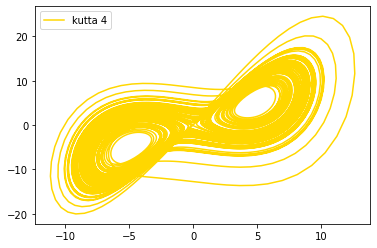

In [96]:
# Ejercicio 4

x0 = (0, 1, 0)
dt = 0.02
n = 10000

sigma = 3
r = 26.5
b = 1

f = lambda x, y, z, t: sigma * (y - x)
g = lambda x, y, z, t: r * x - y - x * z
h = lambda x, y, z, t: x * y - b * z

x_k4, y_k4, z_k4, t_k4 = ode((f, g, h), x0, dt, n, runge_kutta_4, 4)
plt.plot(x_k4, y_k4, color="gold", label="kutta 4")

plt.legend()